

<div class="markdown-google-sans">
  <h1>Feature Engineering</h1>
  <p>weekday, is weekend, number of tokens in title, content etc</p>
</div>

<div>
  <h3>Done by- **Kaniz Fatima**, C191284</h3>
</div>


# Installing Requirements-

In [ ]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.19.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.4.3 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.4.3 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.4.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 30.4 MB/s eta 0:00:00
  Prepar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# Importing Necessary Files

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import warnings
warnings.filterwarnings('ignore')

# Connecting with Drive (/Google Drive)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading from Drive & Checking

In [4]:
data = pd.read_excel('/content/drive/MyDrive/news_share_data.xlsx')
data.shape

(1003, 22)

In [5]:
data.head(15)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000
5,7033985,Apple to Begin iPhone 6 Screen Production in M...,Whispers surrounding a possible iPhone 6 relea...,2014-04-01,0.494269,8,1,0,4.360679,4,Business,3343.790,4817.692,3974.216,31625.000,0.567866,0.098980,0.038190,0.024045,0.666667,-0.333330,1600
6,7014312,"Apple Updates iWork for OS X, iOS and iCloud","Apple updated its iWork suite Tuesday, adding ...",2014-04-01,0.639706,4,1,0,4.594444,7,Lifestyle,2499.333,5549.418,3667.217,4800.000,0.347222,0.186111,0.033333,0.005556,0.000000,0.000000,1300
7,3299703,Spare Your Facebook Friends From These 9 April...,Everybody's a comedian -- at least they think ...,2014-04-01,0.508511,26,8,0,4.713427,7,Tech,3030.861,4622.544,3761.262,3700.000,0.484539,0.134520,0.050100,0.026052,0.400000,-0.150000,2000
8,7014271,Why Tech Takes April Fools' Day So Seriously,Tech journalists hate April Fools' Day. Not be...,2014-04-01,0.481013,9,3,1,4.374613,8,Lifestyle,0.000,6813.466,3745.055,11800.000,0.533060,0.186324,0.046440,0.021672,0.066667,0.033333,2100
9,7008095,Atlanta Is World's Busiest Airport With 94 Mil...,Atlanta's Hartsfield-Jackson airport remained ...,2014-04-01,0.422028,11,1,0,4.272043,5,Business,3343.790,5585.617,4111.006,2600.000,0.502861,0.121931,0.043011,0.018280,0.357143,0.000000,1100


In [6]:
df= data.copy()

# Processing the Data

In [7]:
summary_statistics = df.describe()

# Printing
summary_statistics

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,4.823885e+05,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000


# Creating the Distribution Plot

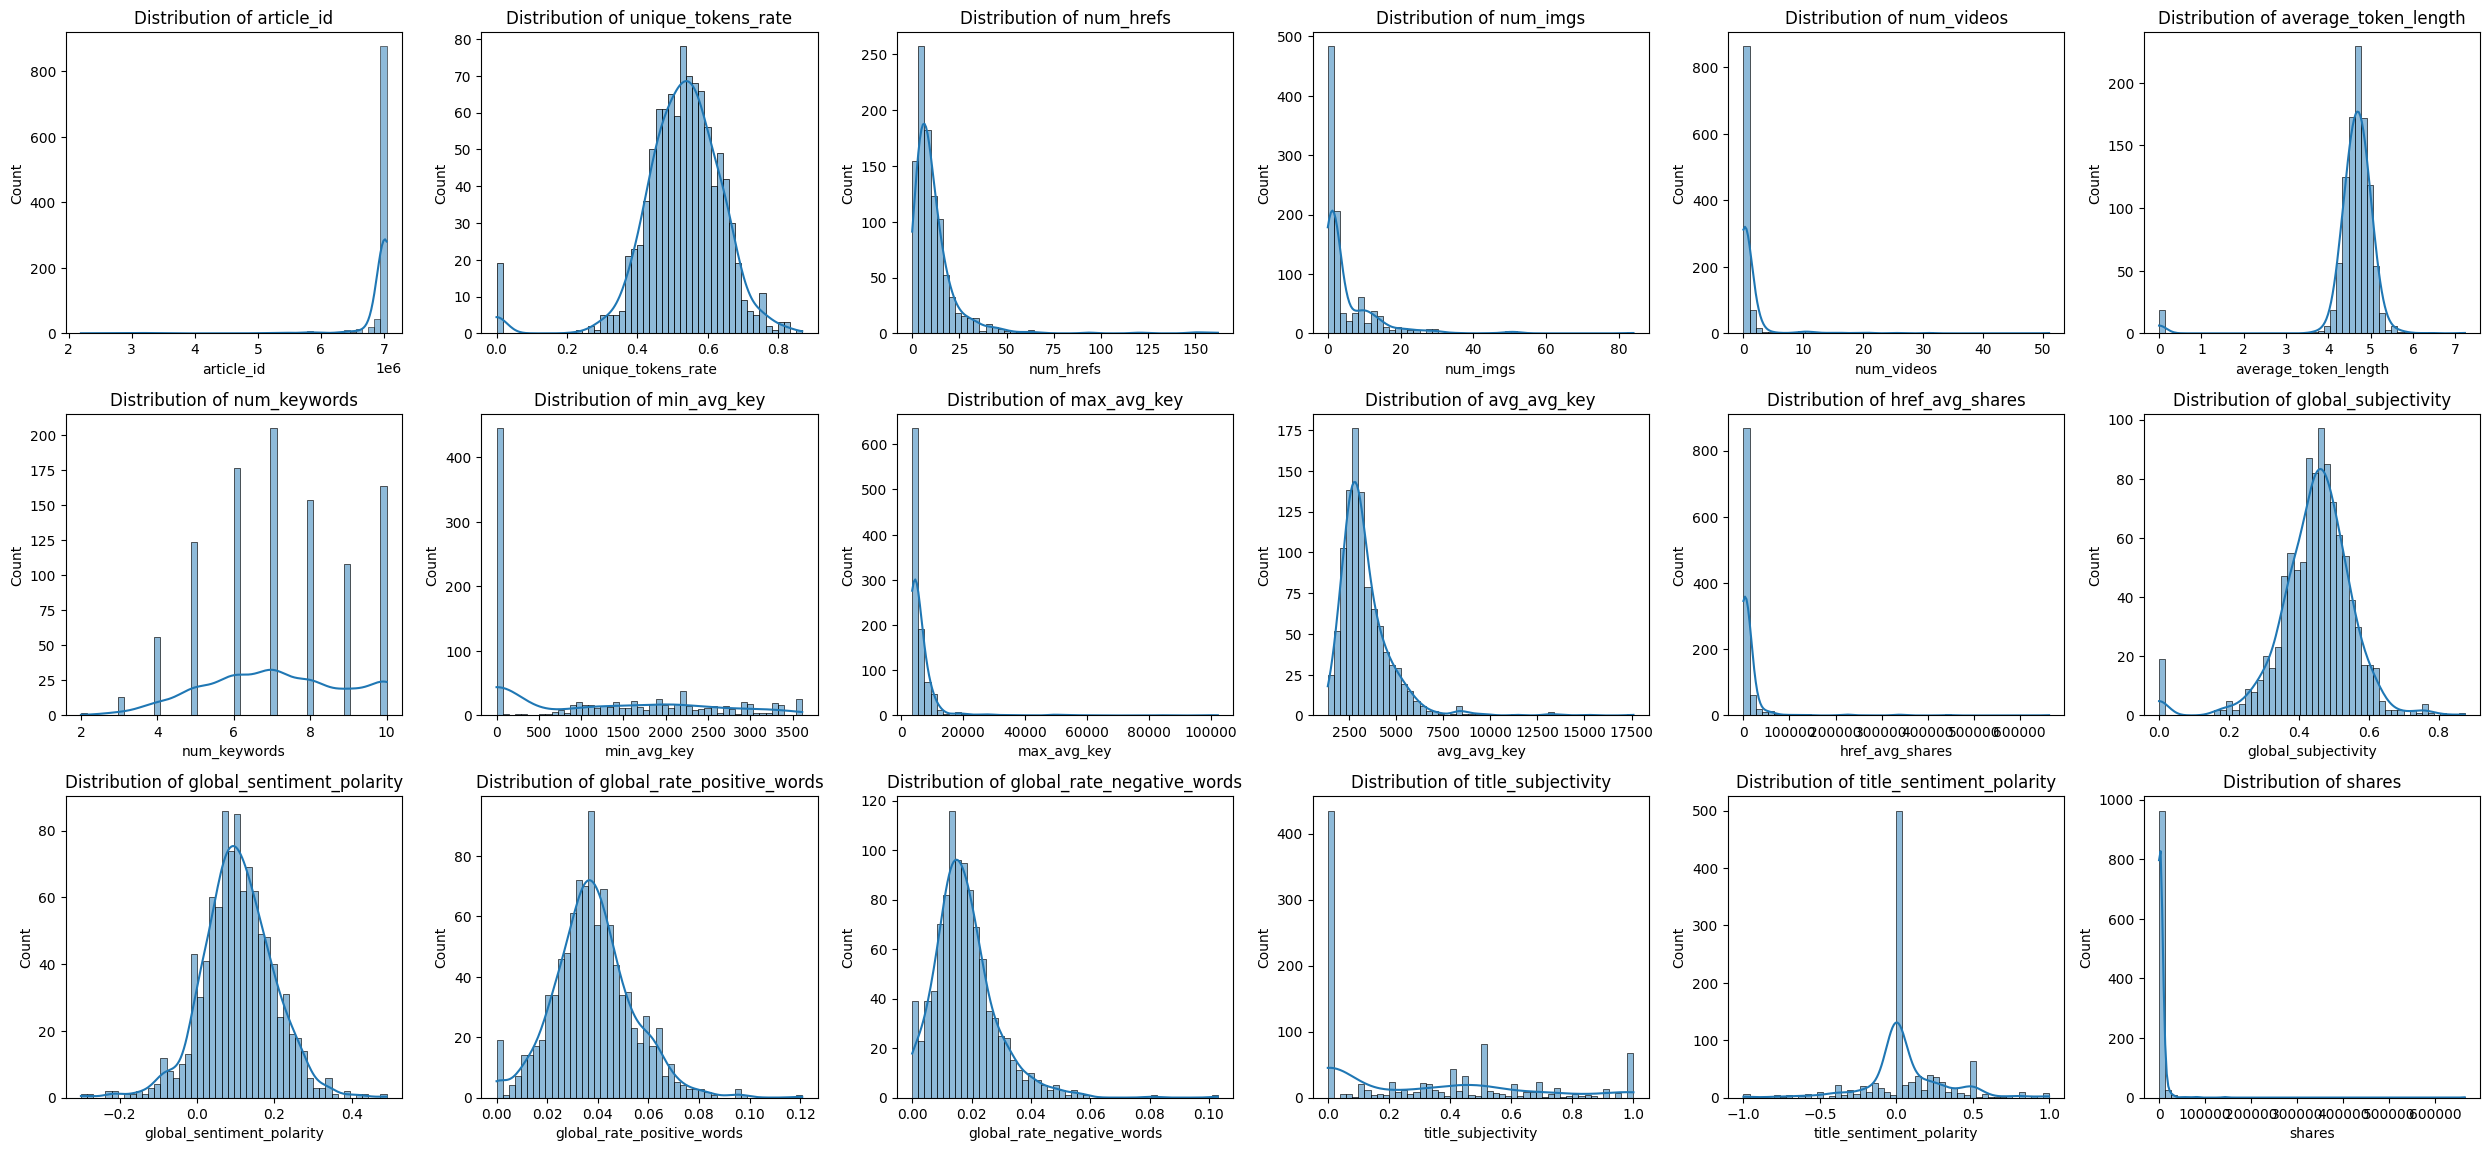

In [8]:
plt.figure(figsize=(25, 15))

for i, feature in enumerate(summary_statistics, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

# Correlation Matrix Plot (Heatmap)

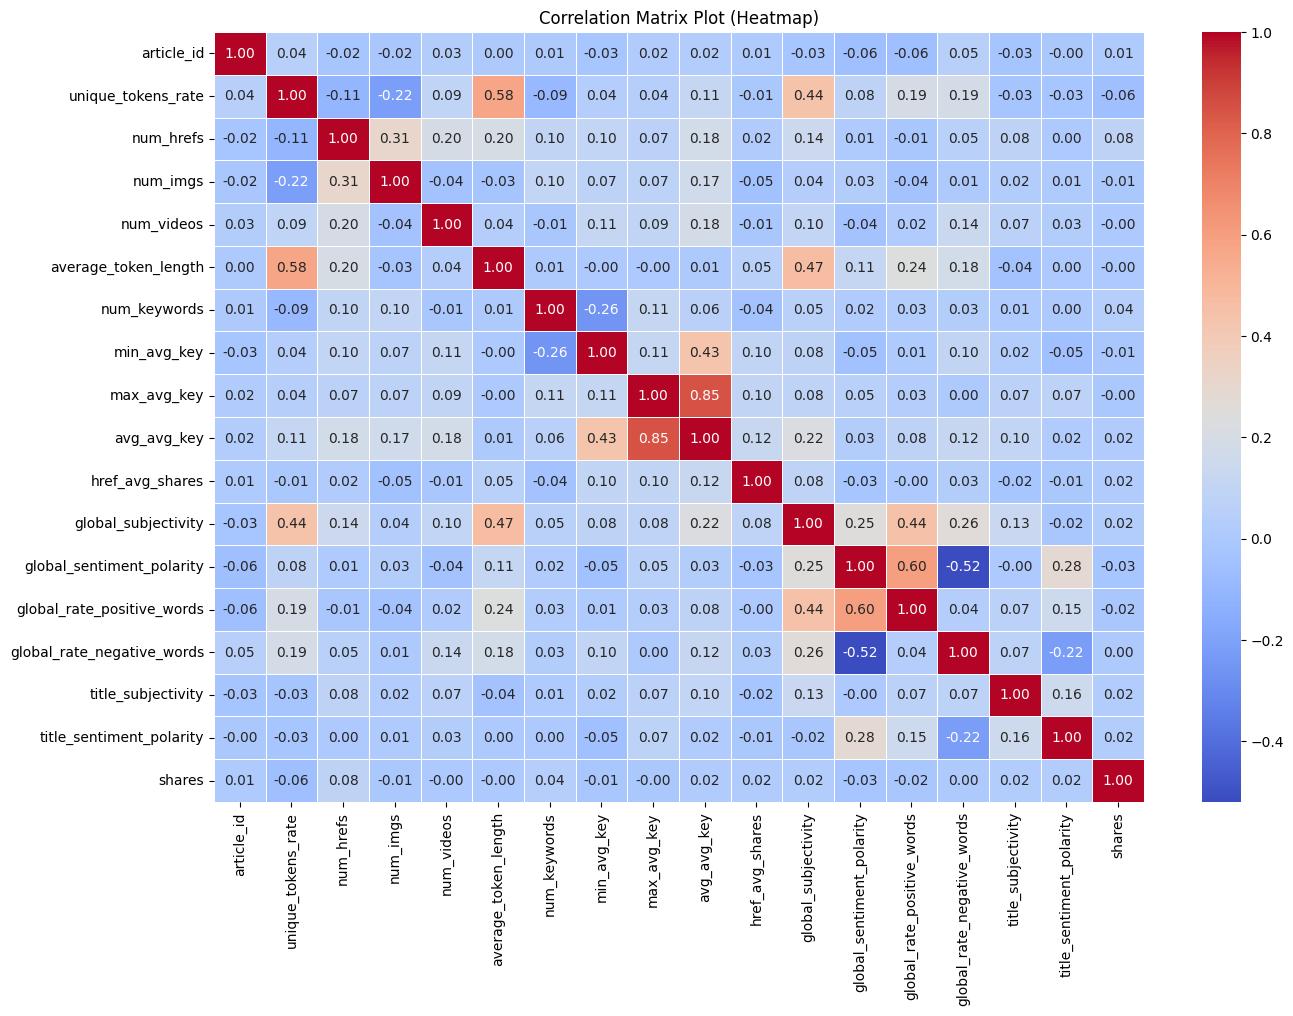

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Plot (Heatmap)')

plt.xticks(rotation=90)
plt.show()

# One-hot & Eone-hot Encoding for Title Column

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# One-hot Encoding
title_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
title_encoded = title_vectorizer.fit_transform(df['title']).toarray()

# Eone-hot Encoding
text_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
text_encoded = text_vectorizer.fit_transform(df['text']).toarray()

# Displaying a Word Cloud after Generating

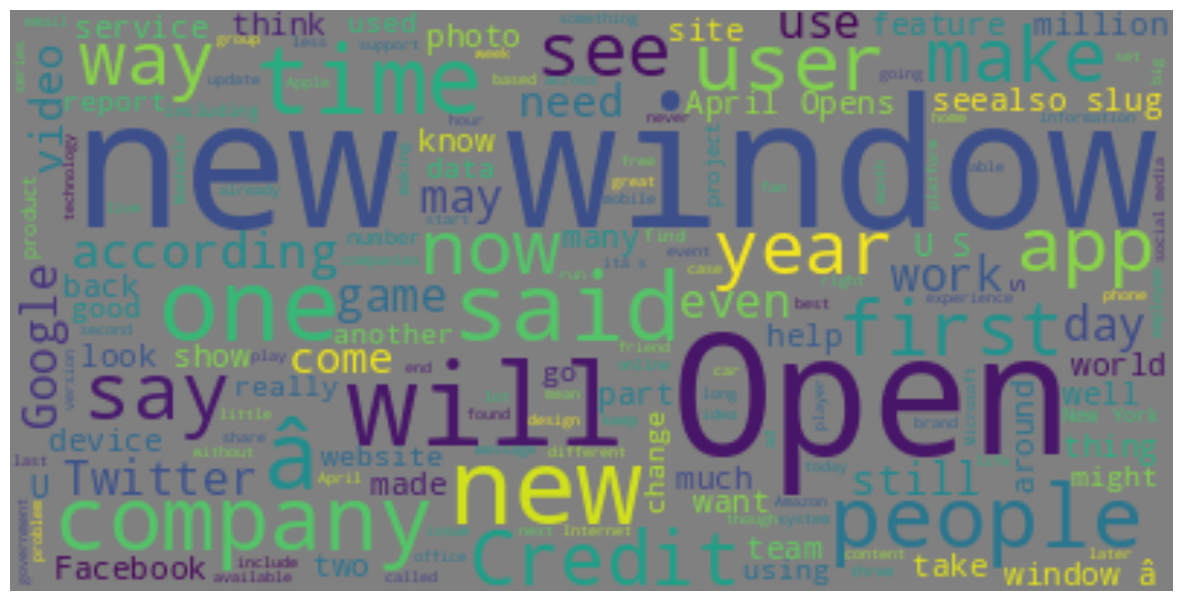

In [15]:
from wordcloud import WordCloud

# Generates a Word Cloud
text = " ".join(article for article in df.text)
wordcloud = WordCloud(background_color="gray").generate(text)

# Displaying the Generated Word Cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Extracting Month and Day of Week Information from Publication Dates *(with graph)*

In [16]:
df['published_date']= pd.to_datetime(df['published_date'])
df['month']= df['published_date'].dt.month
df['day_of_week']= df['published_date'].dt.dayofweek

df[['published_date', 'month', 'day_of_week']].head()

,published_date,month,day_of_week
0,2014-03-31,3,0
1,2014-04-01,4,1
2,2014-04-01,4,1
3,2014-04-01,4,1
4,2014-04-01,4,1


from matplotlib import pyplot as plt
_df_0['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['day_of_week'].plot(kind='hist', bins=20, title='day_of_week')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='month', y='day_of_week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['published_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'published_date'}, axis=1)
              .sort_values('published_date', ascending=True))
  xs = counted['published_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('published_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('published_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['published_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'published_date'}, axis=1)
              .sort_values('published_date', ascending=True))
  xs = counted['published_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('published_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('published_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['day_of_week']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'day_of_week'}, axis=1)
              .sort_values('day_of_week', ascending=True))
  xs = counted['day_of_week']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('day_of_week', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('day_of_week')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['day_of_week'].plot(kind='line', figsize=(8, 4), title='day_of_week')
plt.gca().spines[['top', 'right']].set_visible(False)

# Saving Updated Data into Drive *(UPDATED_news_share_data_file.csv)*

In [17]:
destination_path = '/content/drive/MyDrive/UPDATED_news_share_data_file.csv'
df.to_csv(destination_path, index=False)